<a href="https://colab.research.google.com/github/jacqueslethuaut/netcdf-reader/blob/main/climate_dataset_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xarray h5netcdf fsspec


In [13]:
import os
import requests
import xarray as xr
import matplotlib.pyplot as plt


In [3]:
def download_and_cache_file(url, cache_dir='cache'):
    """
    Download a file and cache it locally.
    """
    os.makedirs(cache_dir, exist_ok=True)

    filename = url.split('/')[-1]
    local_filepath = os.path.join(cache_dir, filename)

    if not os.path.exists(local_filepath):
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            with open(local_filepath, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

    return local_filepath

In [4]:
url = 'https://www.ncei.noaa.gov/pub/data/nidis/indices/nclimgrid-monthly/base-files/nclimgrid-prcp.nc'

In [5]:
local_file = download_and_cache_file(url)

dataset = xr.open_dataset(local_file, chunks={'time': 10})

print(dataset)

<xarray.Dataset>
Dimensions:  (time: 1546, lat: 596, lon: 1385)
Coordinates:
  * time     (time) datetime64[ns] 1895-01-01 1895-02-01 ... 2023-10-01
  * lat      (lat) float32 24.56 24.6 24.65 24.69 ... 49.23 49.27 49.31 49.35
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
Data variables:
    prcp     (time, lat, lon) float32 dask.array<chunksize=(10, 596, 1385), meta=np.ndarray>
Attributes: (12/14)
    date_created:              2023-01-04 04:00:15.550593
    date_modified:             2023-01-04 04:00:15.550762
    Conventions:               CF-1.6, ACDD-1.3
    ncei_template_version:     NCEI_NetCDF_Grid_Template_v2.0
    title:                     nClimGrid
    naming_authority:          gov.noaa.ncei
    ...                        ...
    geospatial_lat_min:        24.5625
    geospatial_lat_max:        49.354168
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospa

In [6]:
print(dataset.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 1546)>
array(['1895-01-01T00:00:00.000000000', '1895-02-01T00:00:00.000000000',
       '1895-03-01T00:00:00.000000000', ..., '2023-08-01T00:00:00.000000000',
       '2023-09-01T00:00:00.000000000', '2023-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      Time, in monthly increments
    standard_name:  time
    axis:           T, 'lat': <xarray.IndexVariable 'lat' (lat: 596)>
array([24.5625  , 24.604166, 24.645834, ..., 49.270832, 49.3125  , 49.354168],
      dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y
    valid_min:      24.5625
    valid_max:      49.354168, 'lon': <xarray.IndexVariable 'lon' (lon: 1385)>
array([-124.6875  , -124.645836, -124.604164, ...,  -67.104164,  -67.0625  ,
        -67.020836], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:   

In [7]:
nombre_de_variables = len(dataset.variables)
print("Nombre de variables :", nombre_de_variables)

Nombre de variables : 4


<xarray.DataArray 'prcp' (time: 12, lat: 596, lon: 1385)>
dask.array<getitem, shape=(12, 596, 1385), dtype=float32, chunksize=(10, 596, 1385), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
  * lat      (lat) float32 24.56 24.6 24.65 24.69 ... 49.23 49.27 49.31 49.35
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
Attributes:
    references:     GHCN-Monthly Version 3 (Vose et al. 2011), NCEI/NOAA, htt...
    long_name:      Precipitation, monthly total
    standard_name:  precipitation_amount
    units:          millimeter
    valid_min:      0.0
    valid_max:      2000.0


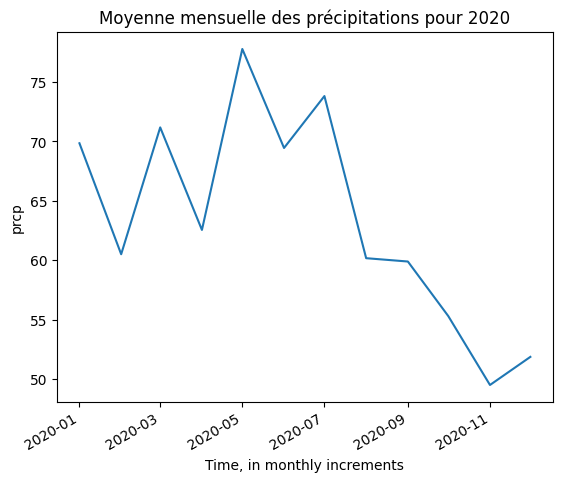

In [14]:
prcp_2020 = dataset['prcp'].sel(time=slice('2020-01-01', '2020-12-31'))

print(prcp_2020)

prcp_2020.mean(dim=['lat', 'lon']).plot()
plt.title('Moyenne mensuelle des précipitations pour 2020')
plt.show()

In [18]:
nombre_nan_prcp_2020 = prcp_2020.isnull().sum().values
print(f"Nombre de NaN dans la variable 'prcp' pour 2020 : {nombre_nan_prcp_2020}")

Nombre de NaN dans la variable 'prcp' pour 2020 : 4268424


In [8]:
df_time = dataset['time'].to_dataframe()
print(df_time.head())

                 time
time                 
1895-01-01 1895-01-01
1895-02-01 1895-02-01
1895-03-01 1895-03-01
1895-04-01 1895-04-01
1895-05-01 1895-05-01


In [9]:
df_lat = dataset['lat'].to_dataframe()
print(df_lat.head())

                 lat
lat                 
24.562500  24.562500
24.604166  24.604166
24.645834  24.645834
24.687500  24.687500
24.729166  24.729166


In [10]:
df_lon = dataset['lon'].to_dataframe()
print(df_lon.head())

                    lon
lon                    
-124.687500 -124.687500
-124.645836 -124.645836
-124.604164 -124.604164
-124.562500 -124.562500
-124.520836 -124.520836


In [15]:
subset_prcp = dataset['prcp'].sel(time='2020').load()

df_subset_prcp = subset_prcp.to_dataframe()

print(df_subset_prcp.head())


                                prcp
time       lat     lon              
2020-01-01 24.5625 -124.687500   NaN
                   -124.645836   NaN
                   -124.604164   NaN
                   -124.562500   NaN
                   -124.520836   NaN


In [17]:
nombre_nan_total = df_subset_prcp.isna().sum().sum()
nombre_nan_par_colonne = df_subset_prcp.isna().sum()

print(nombre_nan_total, nombre_nan_par_colonne)

4268424 prcp    4268424
dtype: int64


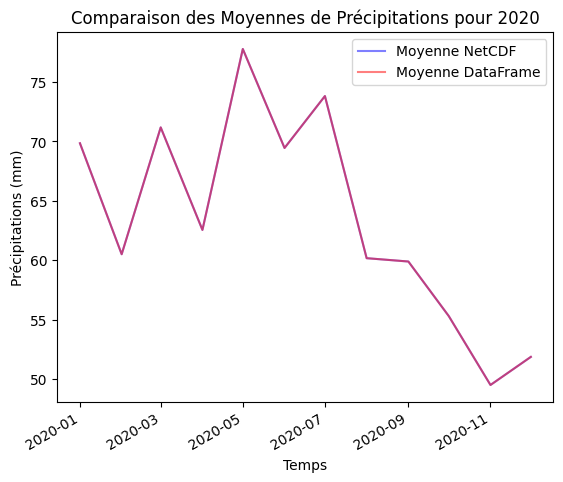

In [20]:
prcp_2020_mean = prcp_2020.mean(dim=['lat', 'lon'])
prcp_2020_mean.plot(label='Moyenne NetCDF', color='blue', alpha=0.5)

# Convertir les données sélectionnées en DataFrame et visualiser
df_prcp_2020 = prcp_2020.to_dataframe().reset_index()
df_prcp_2020_mean = df_prcp_2020.groupby('time').mean()
plt.plot(df_prcp_2020_mean.index, df_prcp_2020_mean['prcp'], label='Moyenne DataFrame', color='red', alpha=0.5)

# Configuration du graphique
plt.title('Comparaison des Moyennes de Précipitations pour 2020')
plt.xlabel('Temps')
plt.ylabel('Précipitations (mm)')
plt.legend()
plt.show()

In [22]:
df_prcp_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,9905520.0,36.958333,7.168756,24.5625,30.760417,36.958334,43.156249,49.354168
lon,9905520.0,-95.854167,16.658957,-124.6875,-110.270836,-95.854164,-81.437500,-67.020836
prcp,5637096.0,63.483059,64.497482,0.0000,13.599609,44.360352,95.849609,1446.299805
